<a href="https://colab.research.google.com/github/arlenkim/study/blob/main/55C3_US_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/content/drive/MyDrive/Colab Notebooks/11-15.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/11-15.ipynb
/content/drive/MyDrive/Colab Notebooks/b52_Regression.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/wine.ipynb
/content/drive/MyDrive/Colab Notebooks/mushroom.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/car_evaluation.csv
/content/drive/MyDrive/Colab Notebooks/car_evaluation.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/mushroom.ipynb
/content/drive/MyDrive/Colab Notebooks/55C3_US_3rd_data.csv
/content/drive/MyDrive/Colab Notebooks/b56_DT_RF_Boost_Reg.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb의 사본 (1)
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb의 사본
/content/drive/MyDrive/Colab Notebooks/55C3_US_RFR.ipynb


In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [4]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/humor-sans/H

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [7]:
data = '//content/drive/MyDrive/Colab Notebooks/55C3_US_3rd_data.csv'
df =pd.read_csv(data, encoding='euc-kr', header=1)
#df = df.drop(df.columns[0], axis=1)

In [8]:
# view dimensions of dataset

df.head(5)

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3,작업일시.6,박스바코드
0,3,2022-11-07,1,2022-11-07 8:19,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N73001,배출,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
1,3,2022-11-07,2,2022-11-07 8:19,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N73002,단변,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2,3,2022-11-07,7,2022-11-07 10:30,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N73007,배출,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
3,3,2022-11-07,8,2022-11-07 10:30,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N73008,배출,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
4,3,2022-11-07,9,2022-11-07 10:30,7,ACQ30454407,"55"" Titan(GI)",SACQ30454407KFA2N73009,배출,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN


In [9]:
df.shape

(2692, 272)

In [11]:
#df3.columns[0:290]

In [12]:
#for i in range(7, 11): 
  #df2 = df.drop(['i:사용여부'], axis=1)

In [10]:
df2 = df.drop(['작업일자', '순번','모델번호', '모델코드', '모델이름','최종공정','선택','탱크온도', '호스온도', '노즐온도','작업일시','작업일시.1', '작업일시.2','작업횟수','작업일시.3', '작업횟수.1','작업일시.4', '작업일시.5','작업일시.6', '박스바코드',
               '1:사용여부','1:평균출력2','1:평균출력3',
               '2:사용여부','2:평균출력2','2:평균출력3',
               '3:사용여부','3:평균출력2','3:평균출력3',
               '4:사용여부','4:평균출력2','4:평균출력3',
               '5:사용여부','5:평균출력2','5:평균출력3',
               '6:사용여부','6:평균출력2','6:평균출력3',
               '7:사용여부','7:평균출력2','7:평균출력3',
               '8:사용여부','8:평균출력2','8:평균출력3',
               '9:사용여부','9:평균출력2','9:평균출력3',
               '10:사용여부','10:평균출력2','10:평균출력3',
               '11:사용여부','11:평균출력2','11:평균출력3',
               '12:사용여부','12:평균출력2','12:평균출력3',
               '13:사용여부','13:평균출력2','13:평균출력3',
               '14:사용여부','14:평균출력2','14:평균출력3',
               '15:사용여부','15:평균출력2','15:평균출력3',
               '16:사용여부','16:평균출력2','16:평균출력3',
               '17:사용여부','17:평균출력2','17:평균출력3',
               '18:사용여부','18:평균출력2','18:평균출력3',
               '19:사용여부','19:평균출력2','19:평균출력3',
               '20:사용여부','20:평균출력2','20:평균출력3',
               '21:사용여부','21:평균출력2','21:평균출력3',
               '22:사용여부','22:평균출력2','22:평균출력3',
               '23:사용여부','23:평균출력2','23:평균출력3',
               '24:사용여부','24:평균출력2','24:평균출력3',
               '1:압력', '1:시간', '1:진폭', '1:주파수',
               '2:압력', '2:시간', '2:진폭', '2:주파수',
               '3:압력', '3:시간', '3:진폭', '3:주파수',
               '4:압력', '4:시간', '4:진폭', '4:주파수',
               '5:압력', '5:시간', '5:진폭', '5:주파수',
               '6:압력', '6:시간', '6:진폭', '6:주파수',
               '7:압력', '7:시간', '7:진폭', '7:주파수',
               '8:압력', '8:시간', '8:진폭', '8:주파수',
               '9:압력', '9:시간', '9:진폭', '9:주파수',
               '10:압력', '10:시간', '10:진폭', '10:주파수',
               '11:압력', '11:시간', '11:진폭', '11:주파수',
               '12:압력', '12:시간', '12:진폭', '12:주파수',
               '13:압력', '13:시간', '13:진폭', '13:주파수',
               '14:압력', '14:시간', '14:진폭', '14:주파수',
               '15:압력', '15:시간', '15:진폭', '15:주파수',
               '16:압력', '16:시간', '16:진폭', '16:주파수',
               '17:압력', '17:시간', '17:진폭', '17:주파수',
               '18:압력', '18:시간', '18:진폭', '18:주파수',
               '19:압력', '19:시간', '19:진폭', '19:주파수',
               '20:압력', '20:시간', '20:진폭', '20:주파수',
               '21:압력', '21:시간', '21:진폭', '21:주파수',
               '22:압력', '22:시간', '22:진폭', '22:주파수',
               '23:압력', '23:시간', '23:진폭', '23:주파수',
               '24:압력', '24:시간', '24:진폭', '24:주파수',               
               ], axis=1)

In [11]:
df2.shape

(2692, 84)

In [12]:
df2.head()

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,...,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
0,3,2022-11-07 8:19,SACQ30454407KFA2N73001,3670,2074,1936.0,3718,1986,1933.0,3824,...,984,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,3,2022-11-07 8:19,SACQ30454407KFA2N73002,3696,1987,1929.0,3719,2073,1934.0,3754,...,984,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,3,2022-11-07 10:30,SACQ30454407KFA2N73007,4036,2225,2176.0,4170,2513,2185.0,4540,...,852,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,3,2022-11-07 10:30,SACQ30454407KFA2N73008,3585,2066,2009.0,3812,2222,1991.0,4501,...,945,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
4,3,2022-11-07 10:30,SACQ30454407KFA2N73009,3744,2157,2114.0,3860,2370,2022.0,4493,...,898,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [13]:
df2.dtypes

라인          int64
생성일시       object
바코드        object
1:에너지       int64
1:최대출력      int64
           ...   
판정.1       object
좌측        float64
판정.2       object
우측        float64
판정.3       object
Length: 84, dtype: object

In [14]:
df2.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,...,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,상부,하부,좌측,우측
count,2692.0,2692.000000,2692.000000,2683.000000,2692.000000,2692.000000,2683.000000,2692.000000,2692.000000,2683.000000,...,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000,2692.000000
mean,3.0,3722.560178,2223.812036,2006.391353,3599.845468,2214.320579,1969.168841,3842.892645,2257.794577,2098.042117,...,3249.056464,2141.725111,1988.570208,1962.380758,1233.670877,1165.943165,-1.037069,-1.653332,-0.690810,-0.276196
std,0.0,312.162587,193.126063,116.947398,323.419250,181.107047,116.347339,283.839917,163.245811,83.217849,...,240.342119,135.744575,139.234284,194.192347,110.466045,110.661442,0.628164,0.514329,0.259364,0.275121
min,3.0,0.000000,0.000000,1523.000000,0.000000,0.000000,1610.000000,0.000000,0.000000,1611.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.730000,-4.230000,-1.650000,-1.220000
25%,3.0,3591.000000,2120.000000,1935.500000,3459.000000,2134.000000,1897.000000,3770.000000,2202.000000,2054.000000,...,3161.000000,2113.000000,1947.000000,1929.000000,1192.000000,1136.000000,-1.380000,-1.912500,-0.810000,-0.380000
50%,3.0,3756.500000,2229.000000,2014.000000,3562.000000,2219.000000,1951.000000,3861.000000,2259.000000,2100.000000,...,3259.000000,2149.000000,2000.000000,2003.000000,1246.000000,1184.000000,-1.170000,-1.640000,-0.660000,-0.200000
75%,3.0,3891.000000,2340.000000,2083.000000,3697.000000,2307.000000,2024.000000,3948.000000,2320.000000,2144.500000,...,3361.000000,2180.000000,2045.000000,2069.000000,1294.000000,1227.000000,-0.950000,-1.380000,-0.530000,-0.090000
max,3.0,4342.000000,2587.000000,2312.000000,4755.000000,2636.000000,2375.000000,4758.000000,2861.000000,2474.000000,...,3654.000000,2374.000000,2271.000000,2337.000000,1497.000000,1417.000000,0.910000,0.530000,0.020000,0.310000


In [15]:
df2.isnull().sum()

라인         0
생성일시       0
바코드        0
1:에너지      0
1:최대출력     0
          ..
판정.1      28
좌측         0
판정.2      28
우측         0
판정.3      28
Length: 84, dtype: int64

In [22]:
df2 = df2.replace(0, np.NaN)

In [16]:
df3 =df2.dropna(axis=0) 
df3.shape

(2655, 84)

In [28]:
df3.isnull().sum()

라인        0
생성일시      0
바코드       0
1:에너지     0
1:최대출력    0
         ..
판정.1      0
좌측        0
판정.2      0
우측        0
판정.3      0
Length: 84, dtype: int64

In [29]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 60

In [30]:
df3.sort_values(by='10:평균출력1',ascending=False)

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,8:에너지,8:최대출력,8:평균출력1,9:에너지,9:최대출력,9:평균출력1,10:에너지,10:최대출력,10:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,18:에너지,18:최대출력,18:평균출력1,19:에너지,19:최대출력,19:평균출력1,20:에너지,20:최대출력,20:평균출력1,21:에너지,21:최대출력,21:평균출력1,22:에너지,22:최대출력,22:평균출력1,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,종합판정,상부,판정,하부,판정.1,좌측,판정.2,우측,판정.3
14,3,2022-11-07 11:53,SACQ30454407KFA2N7300M,3626,2147,1926.0,4000,2362,2140.0,4518,2861,2353.0,3886,2224,2077.0,5323,2979,2777.0,3745,2824,2055.0,5001,2886,2653.0,2653,1774,1586.0,3061,2053,1851.0,3983,2726,2443.0,3224,2048,1886.0,3604,2545,2241.0,2907,2090,1961.0,3051,1888,1802.0,1714,1160,974,3426,2086,2055,3858,2421,2303,3577,2193,2161,3519,2382,2063,3664,2522,2272,3724,2332,2259,3524,2173,2116,3445,2372,2108,1328,1108,866,合,-1.98,合,-1.95,合,-0.94,合,-0.62,合
240,3,2022-11-07 17:19,SACQ30454407KFA2N7307P,3930,2116,2055.0,4157,2296,2170.0,4256,2463,2297.0,4741,2876,2536.0,4334,2556,2282.0,4569,2776,2393.0,5014,2784,2687.0,2530,1677,1508.0,2998,2063,1833.0,4009,2647,2443.0,2937,1968,1782.0,2956,1950,1821.0,2453,1775,1775.0,2599,1863,1528.0,1874,1156,1081,3318,2038,1991,3719,2293,2230,3397,2084,2025,3249,2186,1890,3467,2290,2059,3616,2222,2165,3315,2048,1986,3479,2239,2107,1636,1075,997,合,-1.01,合,-2.09,合,-0.68,合,-0.27,合
208,3,2022-11-07 17:03,SACQ30454407KFA2N7306R,3969,2207,2073.0,4340,2376,2294.0,4186,2473,2271.0,4539,2695,2461.0,4421,2535,2330.0,4797,2913,2526.0,4933,2863,2597.0,2788,1857,1610.0,3356,2288,2005.0,4066,2669,2420.0,3087,2142,1844.0,3336,2155,1993.0,2438,2031,2031.0,2300,1707,1336.0,1774,1206,1034,3341,2097,1986,3613,2181,2140,3427,2070,2011,3440,2286,2022,3579,2357,2143,3593,2200,2120,3257,1974,1943,3375,2089,2027,1742,1160,1054,不,-2.30,不,-2.92,合,-1.37,合,-1.22,合
244,3,2022-11-07 17:21,SACQ30454407KFA2N7307T,3847,2112,2001.0,4353,2461,2338.0,4329,2434,2314.0,4395,2588,2369.0,4481,2524,2391.0,4486,2948,2273.0,4784,2805,2552.0,2832,1843,1751.0,3294,2390,2111.0,3926,2528,2397.0,3065,2272,1977.0,3312,2178,2080.0,2601,2013,2013.0,2616,1835,1578.0,1822,1136,1042,3456,2094,2051,3412,2189,2018,3532,2188,2117,3304,2132,1895,3634,2355,2177,3571,2185,2114,3396,2073,2021,3511,2220,2118,1665,1151,1013,合,-0.93,合,-2.03,合,-0.76,合,-0.06,合
17,3,2022-11-07 12:05,SACQ30454407KFA2N7300Q,3745,2133,2098.0,3953,2374,2157.0,4166,2404,2338.0,4723,2721,2545.0,4532,2518,2353.0,4416,2794,2315.0,4513,2773,2421.0,3751,2407,2297.0,3659,2665,2310.0,4011,2620,2397.0,3432,2186,2020.0,3371,2224,2043.0,2962,1934,1912.0,2869,1874,1660.0,1788,1260,1004,3321,2094,1970,3799,2307,2252,3496,2200,2113,3367,2254,1968,3697,2398,2214,3771,2329,2291,3573,2215,2117,3511,2166,2117,1432,1025,908,不,-2.76,不,-2.77,合,-1.28,合,-0.84,合
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,3,2022-11-14 11:52,SACQ30454407KFA2NE30BL,3718,2189,1980.0,3496,2203,1909.0,3820,2250,2074.0,4201,2330,2181.0,4249,2497,2278.0,3904,2183,1980.0,4458,2538,2389.0,2350,1629,1351.0,2618,1746,1565.0,2242,1465,1298.0,2895,1767,1707.0,3150,2072,1899.0,2296,1751,1751.0,2435,1819,1434.0,1956,1217,1140,3054,1851,1835,3577,2368,2145,3179,2040,1948,3121,1879,1839,3509,2237,2060,3442,2258,2068,3209,2076,1982,3078,2092,1912,2000,1247,1186,合,-1.11,合,-1.71,合,-0.50,合,-0.08,合
555,3,2022-11-08 11:09,SACQ30454407KFA2N83092,3209,2074,1759.0,3119,1914,1705.0,3544,2210,1946.0,3897,2211,2057.0,3923,2184,2109.0,3880,2061,2031.0,4255,2472,2347.0,2252,1686,1340.0,2575,1695,1525.0,2255,1578,1298.0,2790,1922,1647.0,2766,2106,1750.0,2191,1682,

In [31]:
df3.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,8:에너지,8:최대출력,8:평균출력1,9:에너지,9:최대출력,9:평균출력1,10:에너지,10:최대출력,10:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,18:에너지,18:최대출력,18:평균출력1,19:에너지,19:최대출력,19:평균출력1,20:에너지,20:최대출력,20:평균출력1,21:에너지,21:최대출력,21:평균출력1,22:에너지,22:최대출력,22:평균출력1,23:에너지,23:최대출력,23:평균출력1,24:에너지,24:최대출력,24:평균출력1,상부,하부,좌측,우측
count,2655.0,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.00000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.00000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000
mean,3.0,3733.996610,2231.350282,2005.736723,3608.716008,2220.633522,1967.861017,3852.246704,2263.701318,2096.662147,4296.777024,2495.062524,2300.393597,4186.659134,2432.790960,2276.943879,4252.664783,2436.154049,2224.380038,4733.302072,2728.578908,2558.919774,2508.143126,1672.324670,1481.963842,2901.133333,1976.062524,1745.086629,2906.044444,1938.687382,1737.142373,2879.998493,1923.472316,1722.560452,2999.891525,2011.423352,1827.760075,2467.478343,1839.146516,1834.013559,2442.444821,1740.260264,1405.102825,1991.051977,1294.931450,1166.621846,3267.126177,2017.305838,1964.592090,3462.172505,2291.635405,2079.460640,3301.166478,2090.565348,1992.717514,3287.619209,2044.67194,1938.175518,3586.218456,2265.145386,2114.006026,3480.789454,2193.951036,2071.27533,3234.830132,2097.541996,1966.242185,3258.593220,2147.992467,1994.444444,1972.241808,1239.177778,1171.486629,-1.047846,-1.671288,-0.698429,-0.279409
std,0.0,226.197842,144.243125,117.008522,245.156903,127.386938,115.601777,171.029671,94.419709,81.520156,265.477122,181.329308,146.342780,254.299970,98.916567,121.354185,241.738252,198.363991,125.815357,182.461510,117.866236,88.522588,190.462553,124.970158,119.342021,229.294721,186.828480,146.140104,362.738451,224.387231,223.224518,181.844427,138.202141,113.209058,174.400619,129.656471,106.729235,200.524336,157.350728,158.187422,150.582511,123.095565,87.490309,147.619928,106.826197,95.856828,80.829336,54.855911,47.677473,105.168883,81.023351,65.667231,119.049252,63.071222,66.036813,135.795934,100.31924,76.340239,83.739020,61.425008,54.884780,111.226405,52.933934,75.97720,126.537636,49.751141,72.023779,148.806119,53.815623,77.771857,152.820997,82.779990,85.716549,0.622283,0.488094,0.250896,0.275241
min,3.0,2858.000000,1677.000000,1523.000000,2923.000000,1783.000000,1610.000000,3021.000000,1964.000000,1611.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2501.000000,1687.000000,1432.000000,3994.000000,2291.000000,2208.000000,2038.000000,1249.000000,1167.000000,2227.000000,1472.000000,1324.000000,2109.000000,1366.000000,1204.000000,2291.000000,1423.000000,1343.000000,2305.000000,1572.000000,1415.000000,1810.000000,1336.000000,1336.000000,1995.000000,1241.000000,1084.000000,1495.000000,990.000000,907.000000,2894.000000,1795.000000,1746.000000,3141.000000,1981.000000,1875.000000,2811.000000,1872.000000,1755.000000,2195.000000,1419.00000,1374.000000,3251.000000,1987.000000,1905.000000,3141.000000,1945.000000,1805.00000,2834.000000,1904.000000,1676.000000,2824.000000,19

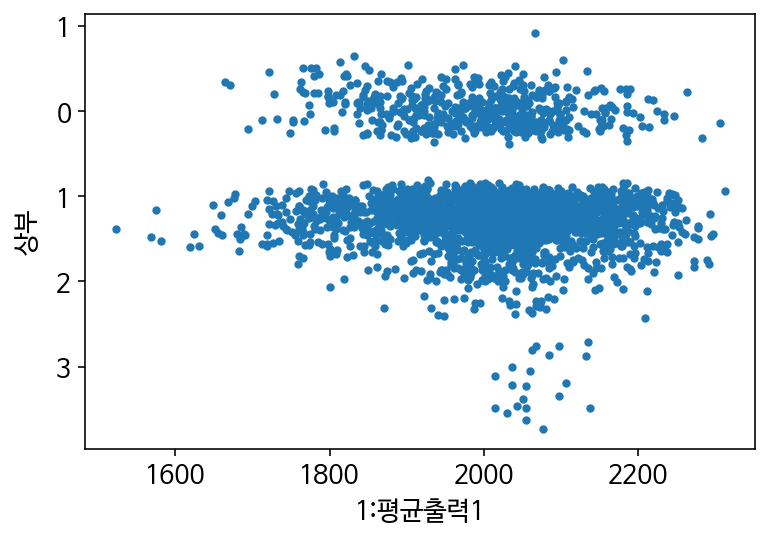

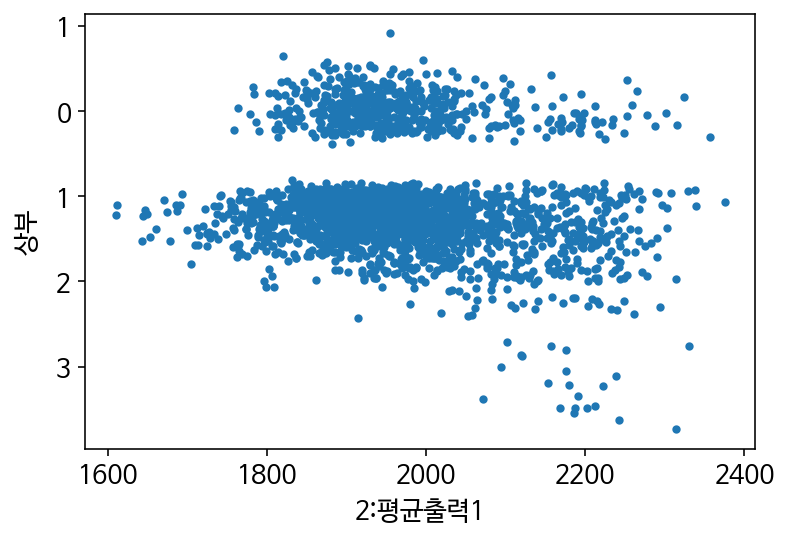

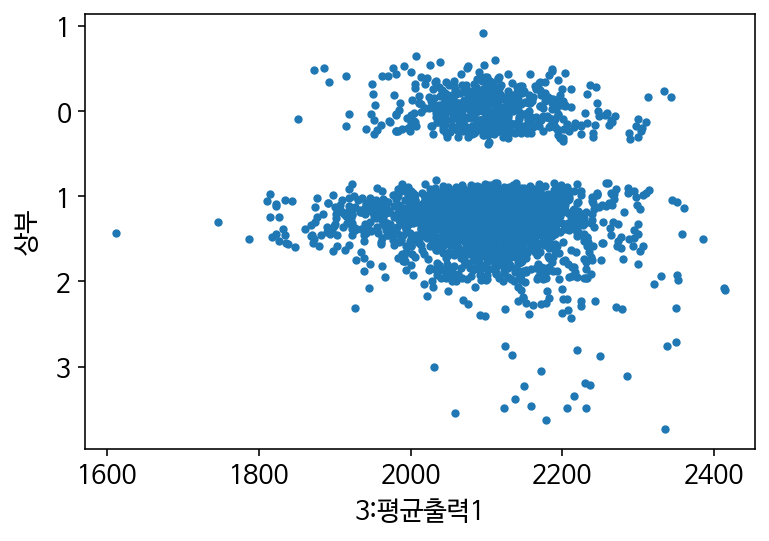

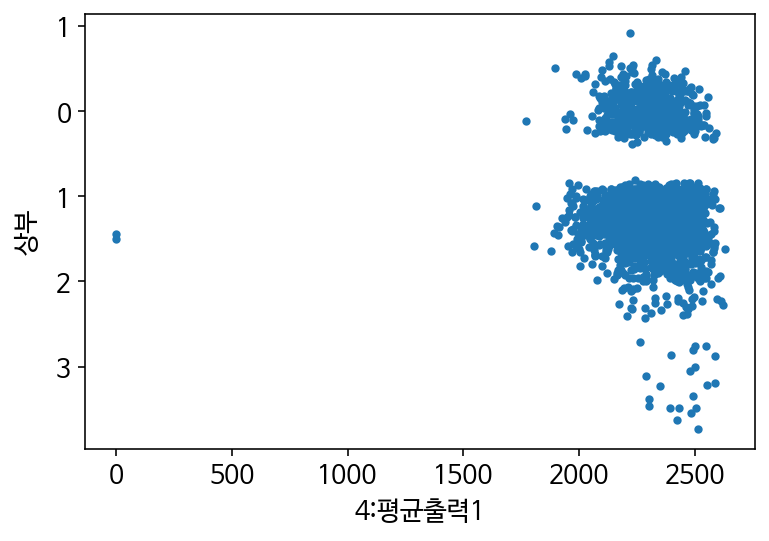

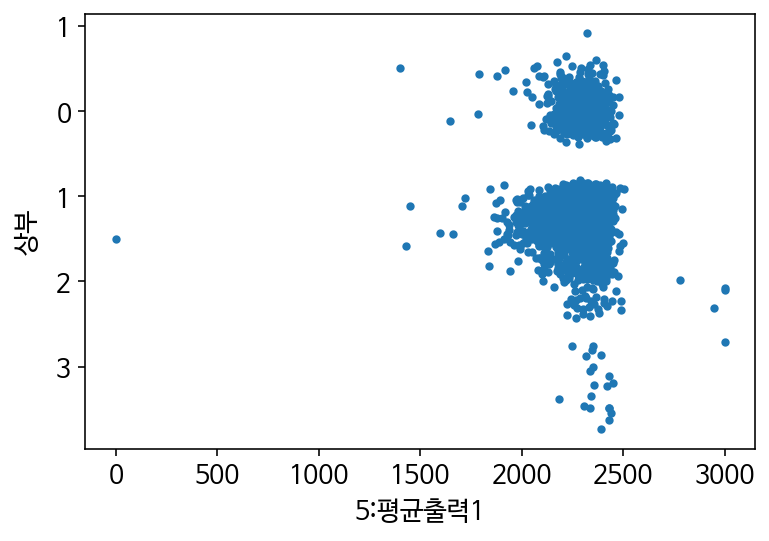

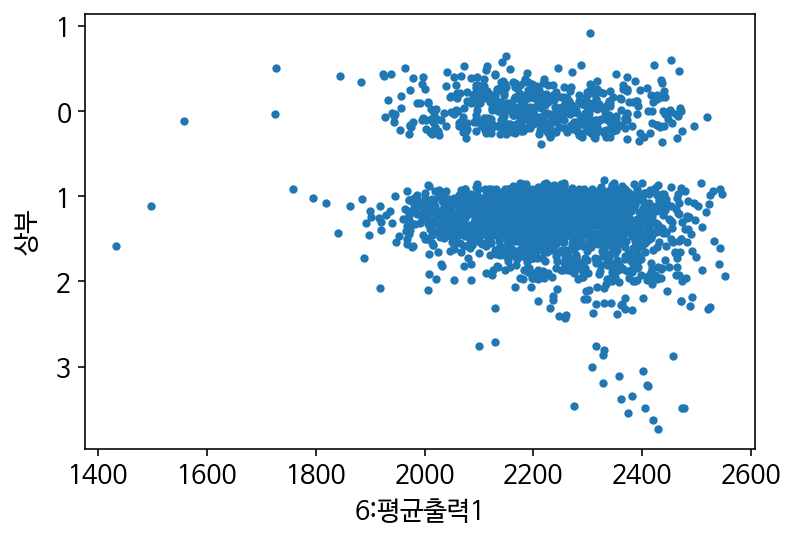

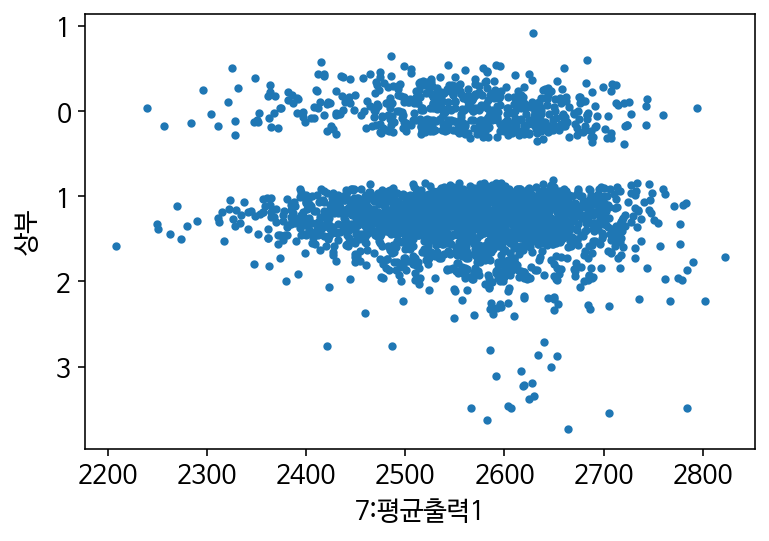

In [19]:
for col in ["1:평균출력1", "2:평균출력1","3:평균출력1","4:평균출력1","5:평균출력1", "6:평균출력1","7:평균출력1"]:
    plt.scatter(df3[col] , df3['상부'], s=10)
    plt.ylabel('상부')
    plt.xlabel(col)
    plt.show()

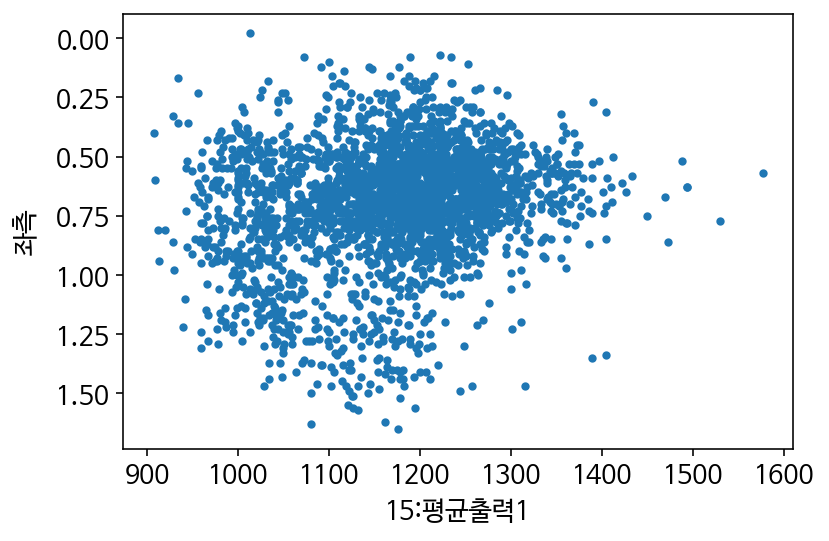

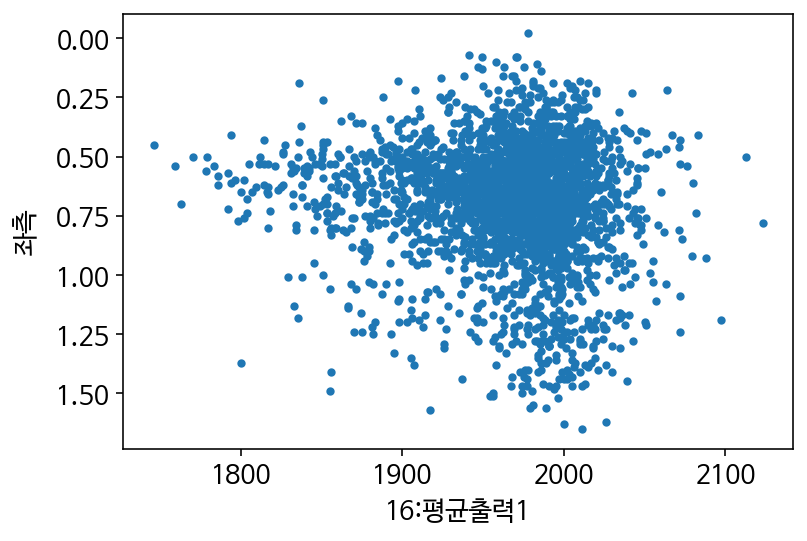

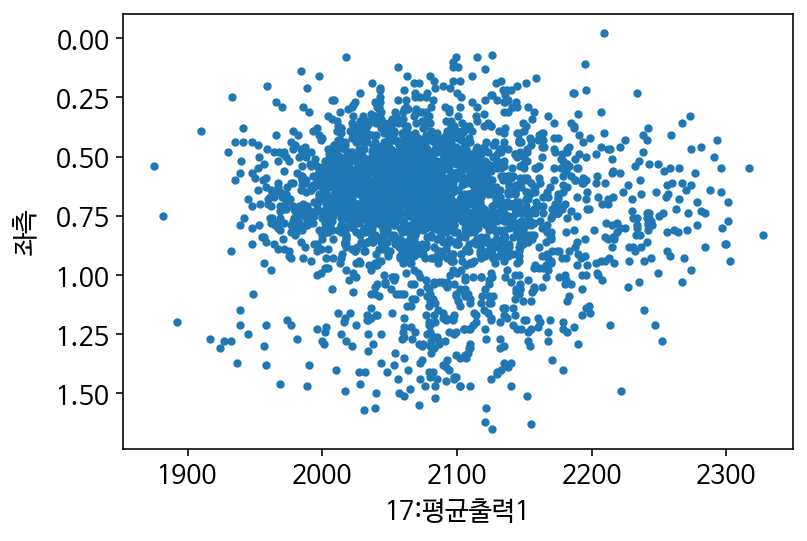

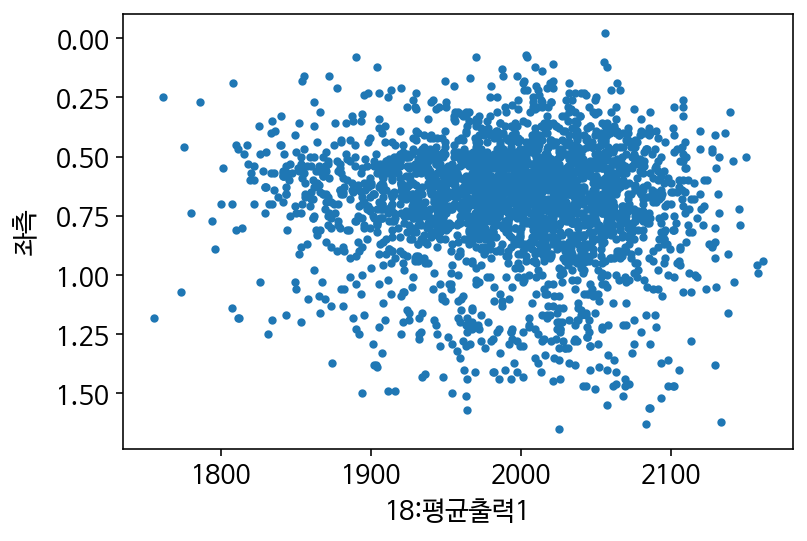

In [26]:
for col in ["15:평균출력1", "16:평균출력1","17:평균출력1","18:평균출력1"]:
    plt.scatter(df3[col] , df3['좌측'], s=10)
    plt.ylabel('좌측')
    plt.xlabel(col)
    plt.show()

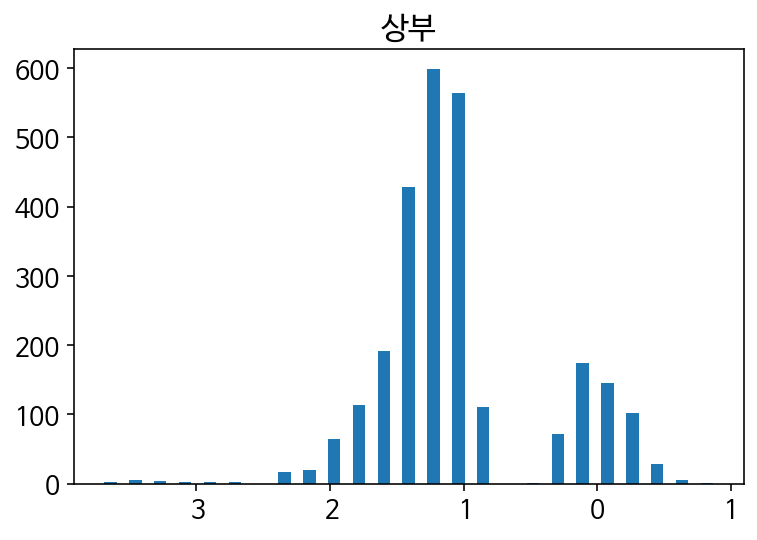

In [32]:
for col in ["상부"]:
    plt.hist(df3[col], bins=25, rwidth=0.5)
    plt.title(col)
    plt.show()

In [33]:
## 훈련 데이터와 검증 데이터 준비

features = df3.columns.difference(["라인", "생성일시", "바코드","종합판정", "판정", "하부", "판정.1", "좌측", "판정.2", "우측", "판정.3","상부",
'8:에너지', '8:최대출력', '8:평균출력1', '9:에너지', '9:최대출력',
       '9:평균출력1', '10:에너지', '10:최대출력', '10:평균출력1', '11:에너지', '11:최대출력',
       '11:평균출력1', '12:에너지', '12:최대출력', '12:평균출력1', '13:에너지', '13:최대출력',
       '13:평균출력1', '14:에너지', '14:최대출력', '14:평균출력1', '15:에너지', '15:최대출력',
       '15:평균출력1', '16:에너지', '16:최대출력', '16:평균출력1', '17:에너지', '17:최대출력',
       '17:평균출력1', '18:에너지', '18:최대출력', '18:평균출력1', '19:에너지', '19:최대출력',
       '19:평균출력1', '20:에너지', '20:최대출력', '20:평균출력1', '21:에너지', '21:최대출력',
       '21:평균출력1', '22:에너지', '22:최대출력', '22:평균출력1', '23:에너지', '23:최대출력',
       '23:평균출력1', '24:에너지', '24:최대출력', '24:평균출력1',
       '1:에너지', '1:평균출력1', '2:에너지', '2:평균출력1', '3:에너지', '3:평균출력1', 
       '4:에너지', '4:평균출력1', '5:에너지', '5:평균출력1', '6:에너지', '6:평균출력1', 
       '7:에너지', '7:평균출력1',])
X = df[features]
y = df["상부"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 , random_state=9, shuffle=True)

In [235]:
#features= features.replace(0, np.NaN)
#features =features.dropna(axis=0) 
#features.shape

In [34]:
X_train.shape, X_test.shape

((1615, 7), (1077, 7))

In [36]:
# check data types in X_train

X_train.dtypes

1:최대출력    int64
2:최대출력    int64
3:최대출력    int64
4:최대출력    int64
5:최대출력    int64
6:최대출력    int64
7:최대출력    int64
dtype: object

In [37]:
X_train.isnull().sum()

1:최대출력    0
2:최대출력    0
3:최대출력    0
4:최대출력    0
5:최대출력    0
6:최대출력    0
7:최대출력    0
dtype: int64

In [38]:
X_train.sort_values(by='1:최대출력',ascending=False)

,1:최대출력,2:최대출력,3:최대출력,4:최대출력,5:최대출력,6:최대출력,7:최대출력
902,2587,2441,2270,2522,2401,2320,2863
856,2576,2485,2324,2468,2508,2545,2913
1479,2561,2355,2297,2412,2514,2518,2850
1712,2560,2350,2256,2593,2453,2653,2919
1472,2559,2528,2378,2609,2481,2670,2775
...,...,...,...,...,...,...,...
2403,0,0,0,0,0,0,0
492,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0
1306,0,0,0,0,0,0,0


In [39]:
X_train = X_train.drop(index=[29,1306,1997,492,2403,2661])
y_train = y_train.drop(index=[29,1306,1997,492,2403,2661])

In [40]:
y_train.sort_values(ascending=False)

614     0.54
1048    0.53
1046    0.53
604     0.51
1057    0.51
        ... 
302    -3.48
296    -3.49
300    -3.55
299    -3.63
297    -3.73
Name: 상부, Length: 1609, dtype: float64

In [41]:
X_test = X_test.fillna(X_train.mean())

depth:  1 , R-squared:  0.0164


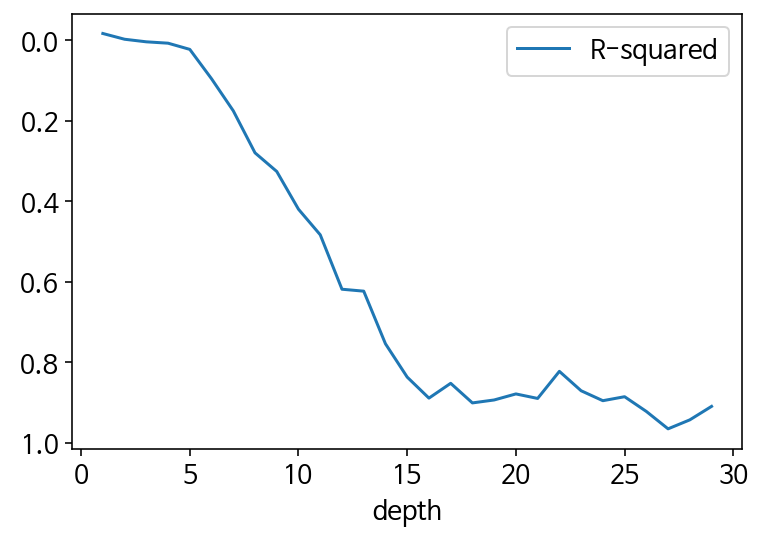

In [61]:
## 결정 트리를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    dtr = DecisionTreeRegressor(max_depth=depth) 
    dtr.fit(X_train, y_train) 
    res.append((depth, dtr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

In [43]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [44]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

Max Error:  2.64
Mean Absolute Error:  0.517
Root Mean Squared Error:  0.694
R-Squared:  -0.254


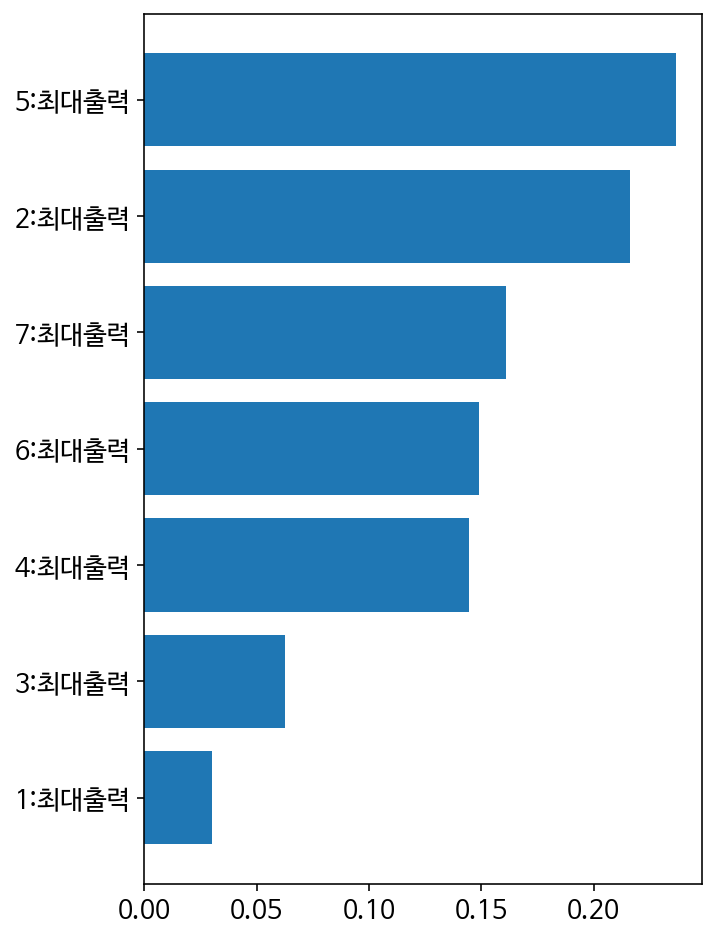

In [45]:
## 결정 트리 모델 성능 확인

dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, dtr.feature_importances_)

depth:  4 , R-squared:  0.0328


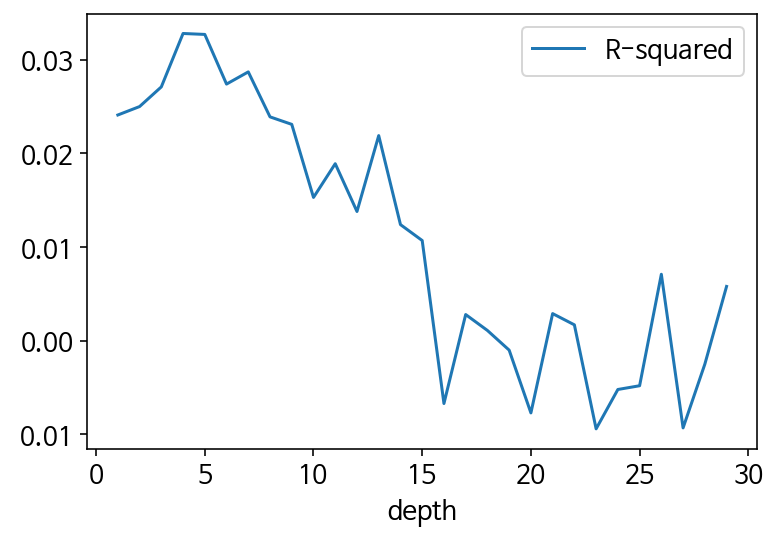

In [46]:
## 랜덤 포레스트를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y_train) 
    res.append((depth, rfr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  2.183
Mean Absolute Error:  0.472
Root Mean Squared Error:  0.618
R-Squared:  0.006


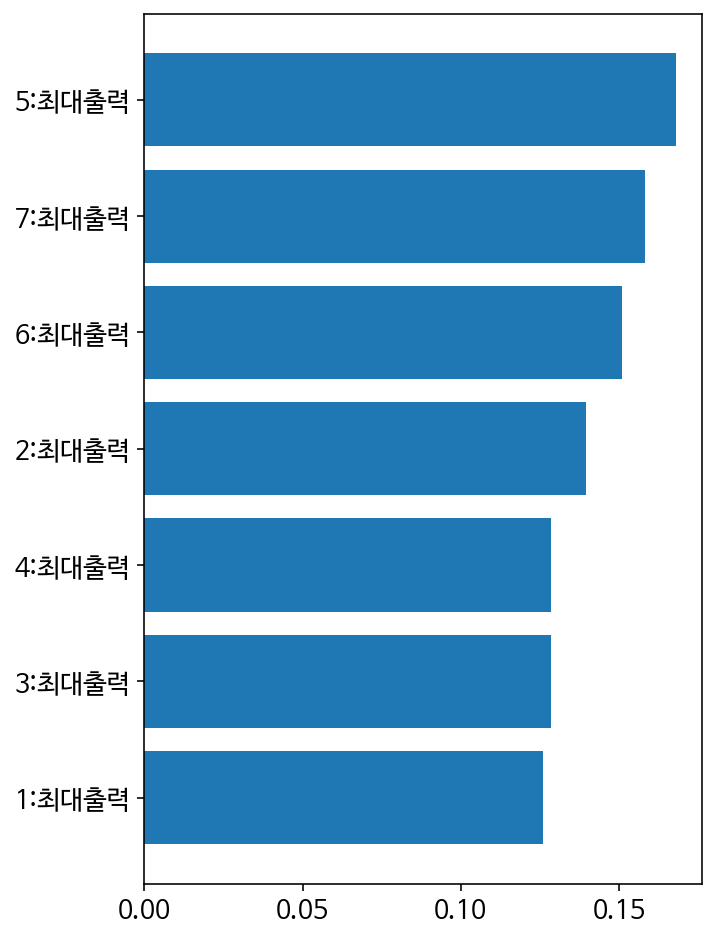

In [47]:
## 랜덤 포레스트 모델 성능 확인

rfr = RandomForestRegressor(max_depth=18)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

depth:  6 , R-squared:  0.0392


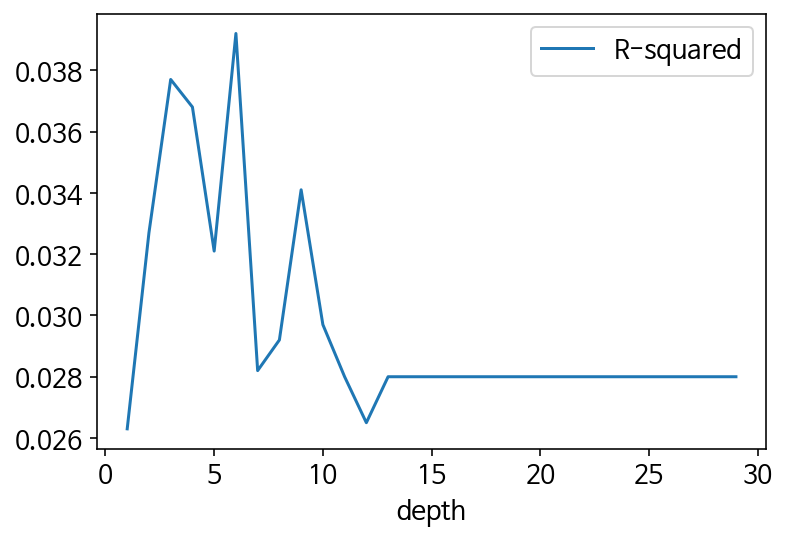

In [48]:
## LightGBM 부스팅 모델을 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    lgbm_r = LGBMRegressor(max_depth=depth, num_leaves=32) 
    lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
    res.append((depth, lgbm_r.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  2.305
Mean Absolute Error:  0.461
Root Mean Squared Error:  0.611
R-Squared:  0.028


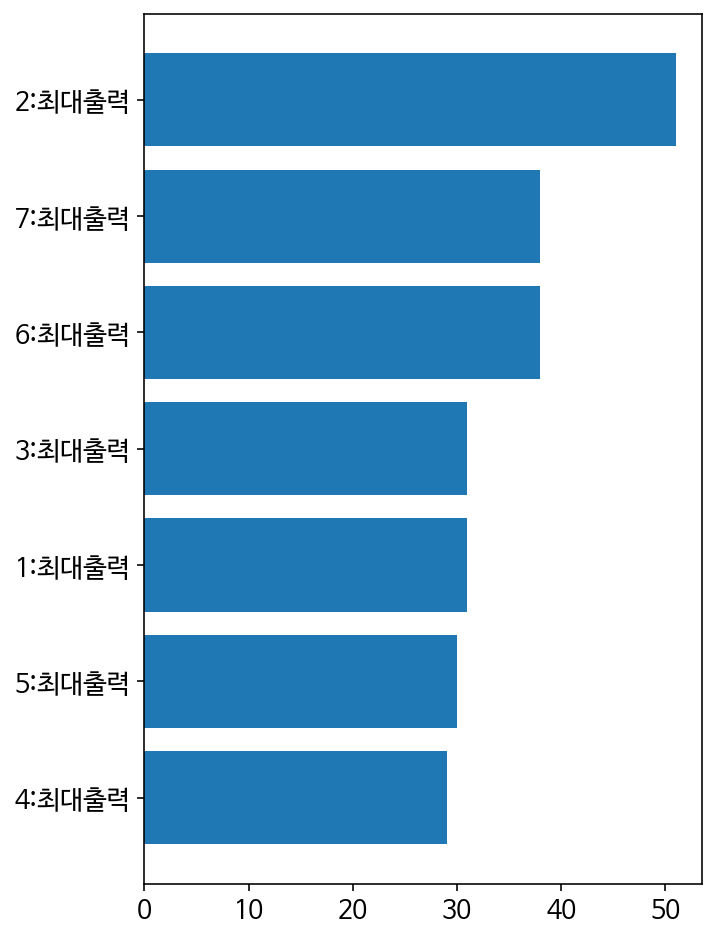

In [49]:
## 부스팅 모델 성능 확인

lgbm_r = LGBMRegressor(max_depth=19, num_leaves=32)
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, lgbm_r.feature_importances_)

In [50]:
y_test

2302   -1.15
204    -1.63
2503   -1.30
2523   -1.23
1528   -1.95
        ... 
1464   -1.22
304    -3.19
2419    0.01
224    -0.93
1095   -1.38
Name: 상부, Length: 1077, dtype: float64

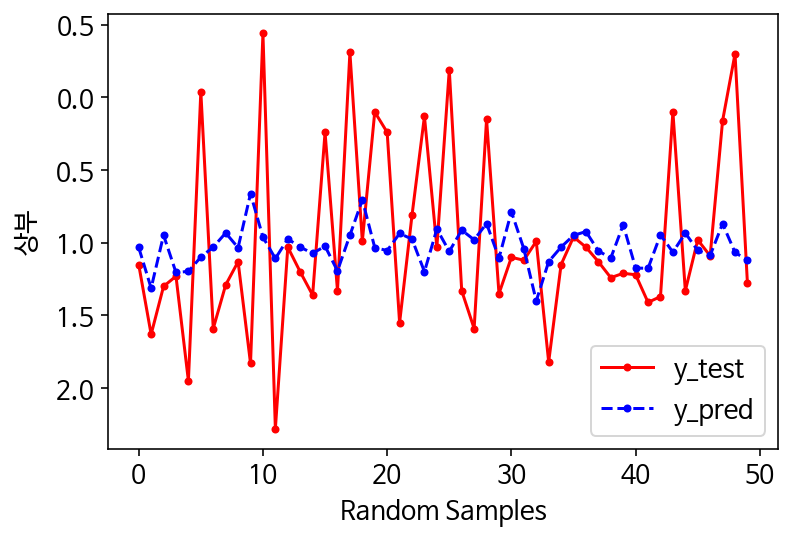

In [55]:
## 회귀 예측과 실제값 샘플 비교하기

def plot_reg_result(y_test, y_pred, N=50):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("상부")
    plt.show()

y_pred = lgbm_r.predict(X_test)
plot_reg_result(y_test, y_pred)